In [1]:
!pip install graphviz
!pip install pydot

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

In [2]:
df = pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15741032,Tsao,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


In [3]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


In [6]:
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card_Type'], drop_first=True)
df.head(6)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Geography_Germany,Geography_Spain,Gender_Male,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,False,True,True,False,False,False


In [7]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head(6)

/var/folders/dc/1xvmckgs1wbf3z5ftb6qwm280000gn/T/ipykernel_4233/2079417471.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Geography_Germany,Geography_Spain,Gender_Male,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,0,1,1,0,0,0


In [8]:
results = smf.logit("Exited ~ Complain", data=df).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.009756
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.9807
Time:                        17:15:41   Log-Likelihood:                -97.557
converged:                       True   LL-Null:                       -5056.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5949      0.500    -15.186      0.000      -8.575      -6.615
Complain      12.9101      0

In [9]:
df = df.drop(columns=['Complain'])

<div dir="rtl">

### הסרת המשתנה Complain מהמודל

ביצענו רגרסיה לוגיסטית עם המשתנה `Complain` כמשתנה מסביר יחיד, וגילינו שהוא חוזה את עזיבת הלקוח באופן כמעט מושלם (Pseudo R² = 0.98, מקדם = 12.91).  
מצב זה מכונה "הפרדה כמעט מושלמת" (quasi-separation), שבו המודל "יודע את התשובה מראש" ולכן אינו מסוגל ללמוד את ההשפעה האמיתית של משתנים אחרים.  

לכן, בחרנו להסיר את המשתנה `Complain` מהמודל הסופי, כדי להימנע מאוברפיטינג ולאפשר ניתוח מדויק ואמין של שאר הגורמים המשפיעים על עזיבת לקוחות.

</div>

In [10]:
from sklearn.model_selection import train_test_split

# המשתנה המוסבר
y = df['Exited']

# משתנים מסבירים (הכל חוץ מהמוסבר)
X = df.drop(columns='Exited')

# חלוקה ל-80% Train ו־20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# בדיקה ראשונית
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (8000, 16)
Test shape: (2000, 16)


In [11]:
import pandas as pd
import statsmodels.formula.api as smf

# מאחדים את X_train ו־y_train
train_df = X_train.copy()
train_df['Exited'] = y_train

# פורמולה מלאה עם אינטראקציות
formula_full = (
    "Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + "
    "HasCrCard + IsActiveMember + EstimatedSalary + Satisfaction_Score + Point_Earned + "
    "Geography_Germany + Geography_Spain + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany + "
    "CreditScore * HasCrCard"
)

# הרצת המודל המלא
model_full = smf.logit(formula=formula_full, data=train_df).fit()

# תצוגת סיכום
print(model_full.summary())

Optimization terminated successfully.
         Current function value: 0.409279
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7979
Method:                           MLE   Df Model:                           20
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1904
Time:                        17:15:41   Log-Likelihood:                -3274.2
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.9939      0.499     -7.997      0.

In [12]:
# מודל אחרי הסרת Satisfaction_Score
formula_drop_satisfaction = (
    "Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + "
    "HasCrCard + IsActiveMember + EstimatedSalary + Point_Earned + "
    "Geography_Germany + Geography_Spain + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany + "
    "CreditScore * HasCrCard"
)

# יצירת DataFrame לאימון
train_df = X_train.copy()
train_df['Exited'] = y_train

# הרצת המודל ושיוך לשם ברור
model_drop_satisfaction = smf.logit(formula=formula_drop_satisfaction, data=train_df).fit()
print(model_drop_satisfaction.summary())

Optimization terminated successfully.
         Current function value: 0.409291
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7980
Method:                           MLE   Df Model:                           19
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1904
Time:                        17:15:41   Log-Likelihood:                -3274.3
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.0235      0.495     -8.129      0.

In [13]:
# מודל אחרי הסרת HasCrCard ו-CreditScore:HasCrCard
formula_drop_hascrcard_interaction = (
    "Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + "
    "IsActiveMember + EstimatedSalary + Point_Earned + "
    "Geography_Germany + Geography_Spain + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת הדאטה לאימון
train_df = X_train.copy()
train_df['Exited'] = y_train

# הרצת המודל עם שם ברור
model_drop_hascrcard_interaction = smf.logit(
    formula=formula_drop_hascrcard_interaction, data=train_df
).fit()

# הצגת סיכום
print(model_drop_hascrcard_interaction.summary())

Optimization terminated successfully.
         Current function value: 0.409459
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7982
Method:                           MLE   Df Model:                           17
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1901
Time:                        17:15:41   Log-Likelihood:                -3275.7
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.2975      0.379    -11.338      0.

In [14]:
# מודל לאחר הסרת Geography_Spain בלבד
formula_drop_geography_spain = (
    "Exited ~ CreditScore + Age + Tenure + Balance + NumOfProducts + "
    "IsActiveMember + EstimatedSalary + Point_Earned + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    
    # אינטראקציות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# יצירת DataFrame חדש עבור סט האימון
train_df = X_train.copy()
train_df['Exited'] = y_train

# הרצת המודל עם שם ברור
model_drop_geography_spain = smf.logit(
    formula=formula_drop_geography_spain, data=train_df
).fit()

# הדפסת הסיכום
print(model_drop_geography_spain.summary())

Optimization terminated successfully.
         Current function value: 0.409478
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7983
Method:                           MLE   Df Model:                           16
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1900
Time:                        17:15:41   Log-Likelihood:                -3275.8
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.2857      0.378    -11.326      0.

In [15]:
formula = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + EstimatedSalary + Point_Earned + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    
    # אינטראקציות מעניינות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת מודל הלוגיסטי
model = smf.logit(formula=formula, data=train_df).fit()

# סיכום תוצאות
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.409525
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7984
Method:                           MLE   Df Model:                           15
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1900
Time:                        17:15:41   Log-Likelihood:                -3276.2
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.3295      0.375    -11.543      0.

In [16]:
# מודל לאחר הסרת Tenure בלבד
formula_drop_Tenure = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + EstimatedSalary + Point_Earned + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    
    # אינטראקציות שנשארו:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# יצירת עותק של סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת המודל אחרי הסרת Tenure
model_drop_Tenure = smf.logit(formula=formula_drop_Tenure, data=train_df).fit()

# תצוגת סיכום
print(model_drop_Tenure.summary())

Optimization terminated successfully.
         Current function value: 0.409525
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7984
Method:                           MLE   Df Model:                           15
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1900
Time:                        17:15:41   Log-Likelihood:                -3276.2
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.3295      0.375    -11.543      0.

In [17]:
formula = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    
    # אינטראקציות מעניינות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת מודל הלוגיסטי
model = smf.logit(formula=formula, data=train_df).fit()

# סיכום תוצאות
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.409690
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1896
Time:                        17:15:42   Log-Likelihood:                -3277.5
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.3759      0.360    -12.158      0.

In [18]:
formula = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + "
    
    # אינטראקציות מעניינות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת מודל הלוגיסטי
model = smf.logit(formula=formula, data=train_df).fit()

# סיכום תוצאות
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.409810
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1894
Time:                        17:15:42   Log-Likelihood:                -3278.5
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4309      0.358    -12.383      0.

In [19]:
formula = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + "
    
    # אינטראקציות מעניינות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת מודל הלוגיסטי
model = smf.logit(formula=formula, data=train_df).fit()

# סיכום תוצאות
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.409868
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1893
Time:                        17:15:42   Log-Likelihood:                -3278.9
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4523      0.357    -12.470      0.

In [20]:
formula = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + "
    "Geography_Germany + Gender_Male + "
    
    # אינטראקציות מעניינות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# הכנת סט האימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת מודל הלוגיסטי
model = smf.logit(formula=formula, data=train_df).fit()

# סיכום תוצאות
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.410070
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1889
Time:                        17:15:42   Log-Likelihood:                -3280.6
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4854      0.357    -12.580      0.

In [21]:
# המודל הסופי לאחר ניקוי כל המשתנים הלא מובהקים
formula_final_model_cleaned = (
    "Exited ~ CreditScore + Age + Balance + NumOfProducts + "
    "IsActiveMember + "
    "Geography_Germany + Gender_Male + "
    "Card_Type_GOLD + Card_Type_PLATINUM + Card_Type_SILVER + "
    
    # אינטראקציות:
    "Age * IsActiveMember + "
    "Balance * NumOfProducts + "
    "Gender_Male * Geography_Germany"
)

# בניית סט אימון
train_df = X_train.copy()
train_df["Exited"] = y_train

# הרצת המודל הסופי
model_final_cleaned = smf.logit(formula=formula_final_model_cleaned, data=train_df).fit()

# הצגת סיכום
print(model_final_cleaned.summary())

Optimization terminated successfully.
         Current function value: 0.409690
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                  0.1896
Time:                        17:15:42   Log-Likelihood:                -3277.5
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.3759      0.360    -12.158      0.

Optimal Cutoff Threshold: 0.2331


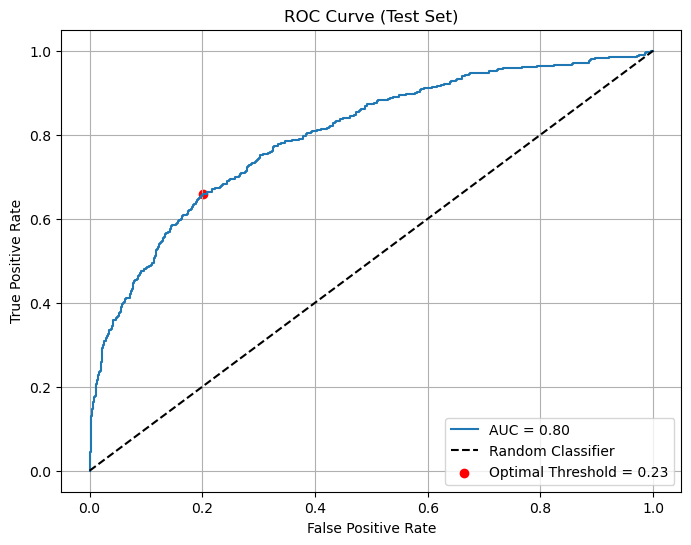

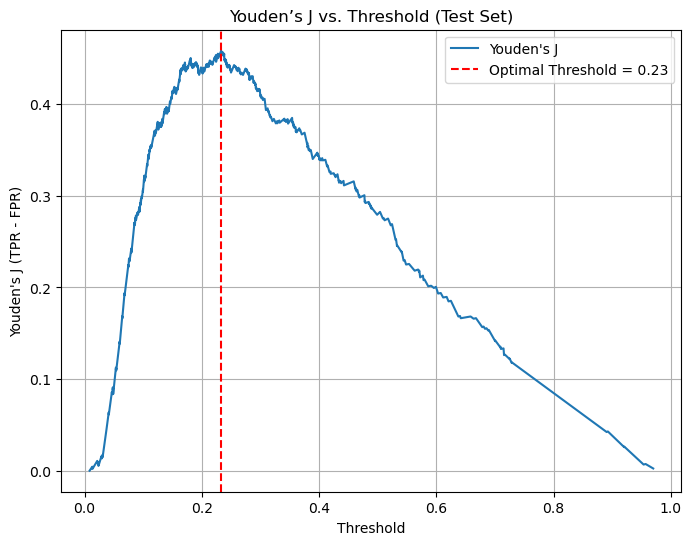

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# חיזוי הסתברויות על סט הטסט לפי המודל הלוגיסטי שנבנה על train_df
X_test_with_const = sm.add_constant(X_test)
y_test_proba = model.predict(X_test_with_const)

# y_true = y_test מתוך סט הטסט
y_true = y_test

# חישוב ROC ו־AUC
fpr, tpr, thresholds = roc_curve(y_true, y_test_proba)
auc_score = roc_auc_score(y_true, y_test_proba)

# מציאת סף אופטימלי לפי סטטיסטיקת Youden
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Cutoff Threshold: {optimal_threshold:.4f}")

# גרף ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# גרף Youden's J
plt.figure(figsize=(8,6))
plt.plot(thresholds, youden_j, label="Youden's J")
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Youden's J (TPR - FPR)")
plt.title("Youden’s J vs. Threshold (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

Optimal Threshold: 0.23


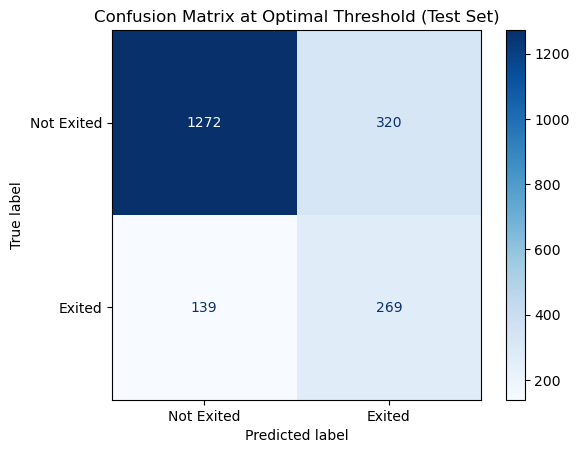

Classification Report at Optimal Threshold (Test Set):
              precision    recall  f1-score   support

  Not Exited       0.90      0.80      0.85      1592
      Exited       0.46      0.66      0.54       408

    accuracy                           0.77      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.81      0.77      0.78      2000



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# שלב 1: חיזוי הסתברויות על סט הבדיקה
X_test_const = sm.add_constant(X_test)
y_pred_proba = model.predict(X_test_const)

# שלב 2: חישוב סף אופטימלי
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# שלב 3: חיזוי על בסיס סף אופטימלי
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# שלב 4: מטריצת בלבול
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix at Optimal Threshold (Test Set)")
plt.grid(False)
plt.show()

# שלב 5: דוח סיווג
print("Classification Report at Optimal Threshold (Test Set):")
print(classification_report(y_test, y_pred_optimal, target_names=["Not Exited", "Exited"]))

<div dir="rtl">

### סיכום לפי סף חיתוך 0.2

בשימוש בסף חיתוך של 0.2, המודל הצליח לזהות כ־70% מהלקוחות שעזבו (Recall גבוה).  
עם זאת, הדיוק החיובי (Precision) ירד לכ־37%, כלומר כשליש מהתחזיות על עזיבה היו שגויות.  
מדובר במודל עם רגישות גבוהה, שמעדיף לזהות עוזבים גם במחיר של אזעקות שווא.  
מתאים למצבים בהם עדיף לפנות ללקוח מיותר מאשר לפספס לקוח שעומד לעזוב.

</div>

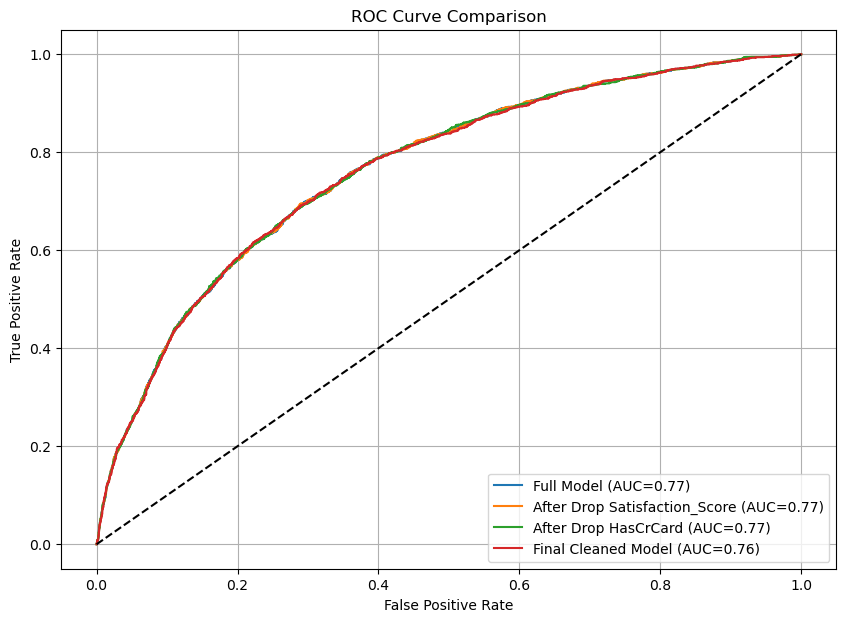

Model Comparison Summary:
                        Model   AUC  Optimal Threshold  Accuracy  F1 Score   LogLik  Num Features
                   Full Model 0.766               0.20     0.704     0.490 -3436.20            16
After Drop Satisfaction_Score 0.766               0.20     0.708     0.492 -3436.28            15
         After Drop HasCrCard 0.766               0.21     0.710     0.490 -3437.30            14
          Final Cleaned Model 0.765               0.20     0.707     0.490 -3441.97             7


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# הגדרת y_train
y = y_train.copy()

# הגדרת מודלים להשוואה – עדכני לפי סדר הסרת משתנים
models = {
    "Full Model": [
        'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'IsActiveMember', 'EstimatedSalary', 'Satisfaction_Score', 'Point_Earned',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male',
        'Card_Type_GOLD', 'Card_Type_PLATINUM', 'Card_Type_SILVER', 'HasCrCard'
    ],
    "After Drop Satisfaction_Score": [
        'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'IsActiveMember', 'EstimatedSalary', 'Point_Earned',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male',
        'Card_Type_GOLD', 'Card_Type_PLATINUM', 'Card_Type_SILVER', 'HasCrCard'
    ],
    "After Drop HasCrCard": [
        'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'IsActiveMember', 'EstimatedSalary', 'Point_Earned',
        'Geography_Germany', 'Geography_Spain', 'Gender_Male',
        'Card_Type_GOLD', 'Card_Type_PLATINUM', 'Card_Type_SILVER'
    ],
    "Final Cleaned Model": [
        'CreditScore', 'Age', 'Balance', 'NumOfProducts',
        'IsActiveMember', 'Geography_Germany', 'Gender_Male'
    ]
}

# גרף ROC
plt.figure(figsize=(10, 7))
results_summary = []

for label, features in models.items():
    X_sub = X_train[features]
    X_sub_const = sm.add_constant(X_sub)
    model = sm.Logit(y, X_sub_const).fit(disp=False)

    y_proba = model.predict(X_sub_const)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    auc = roc_auc_score(y, y_proba)

    # חישוב סף אופטימלי
    youden_j = tpr - fpr
    opt_idx = np.argmax(youden_j)
    opt_threshold = thresholds[opt_idx]

    # חיזוי בינארי
    y_pred = (y_proba >= opt_threshold).astype(int)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    results_summary.append({
        'Model': label,
        'AUC': round(auc, 3),
        'Optimal Threshold': round(opt_threshold, 2),
        'Accuracy': round(acc, 3),
        'F1 Score': round(f1, 3),
        'LogLik': round(model.llf, 2),
        'Num Features': len(features)
    })

    plt.plot(fpr, tpr, label=f"{label} (AUC={auc:.2f})")

# הצגת גרף ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# טבלת סיכום
summary_df = pd.DataFrame(results_summary).sort_values(by='AUC', ascending=False)
print("Model Comparison Summary:")
print(summary_df.to_string(index=False))

<div dir="rtl">

# סיכום מודל רגרסיה לוגיסטית – חיזוי עזיבת לקוחות

המודל פותח במטרה לחזות אילו לקוחות צפויים לעזוב את הבנק (`Exited = 1`).  
לאחר תהליך בניית המודל ובחירת סף סיווג אופטימלי לפי מדד **Youden**, התקבלו התוצאות הבאות:

- **AUC (שטח תחת עקומת ROC):** ‎0.80 – מצביע על יכולת הבחנה טובה בין לקוחות עוזבים לנשארים.  
- **סף סיווג אופטימלי:** ‎0.23 – נבחר כך שיאזן בין רגישות (Recall) לבין ספציפיות (Specificity).  
- **דיוק כללי (Accuracy):** ‎0.77 – כ־77% מהתחזיות נכונות בסט הבדיקה.  
- **Precision בקבוצת העוזבים:** ‎0.46 – מתוך הלקוחות שסווגו כעוזבים, 46% אכן עזבו בפועל.  
- **Recall בקבוצת העוזבים:** ‎0.66 – המודל זיהה 66% מהלקוחות שבאמת עזבו.  
- **F1 Score:** ‎0.54 – ממוצע הרמוני של Precision ו־Recall בקבוצת העוזבים.  

**טבלת טעויות (Confusion Matrix) – סט הבדיקה:**
- **True Positives** (חזוי עוזב ואכן עזב): ‎269  
- **False Positives** (חזוי עוזב אך נשאר): ‎320  
- **True Negatives** (חזוי נשאר ואכן נשאר): ‎1272  
- **False Negatives** (חזוי נשאר אך עזב): ‎139  

---

**מסקנה:** המודל מציג ביצועים יציבים ויכולת חיזוי טובה יחסית, במיוחד בזיהוי לקוחות פוטנציאליים לעזיבה, אך יש מקום לשיפור הדיוק בקבוצת העוזבים. שיפור זה עשוי להתבצע באמצעות שימוש במודלים מתקדמים יותר כמו Random Forest או Gradient Boosting.

</div>

ה-K הכי טוב לפי F1: 5 עם F1 = 0.477


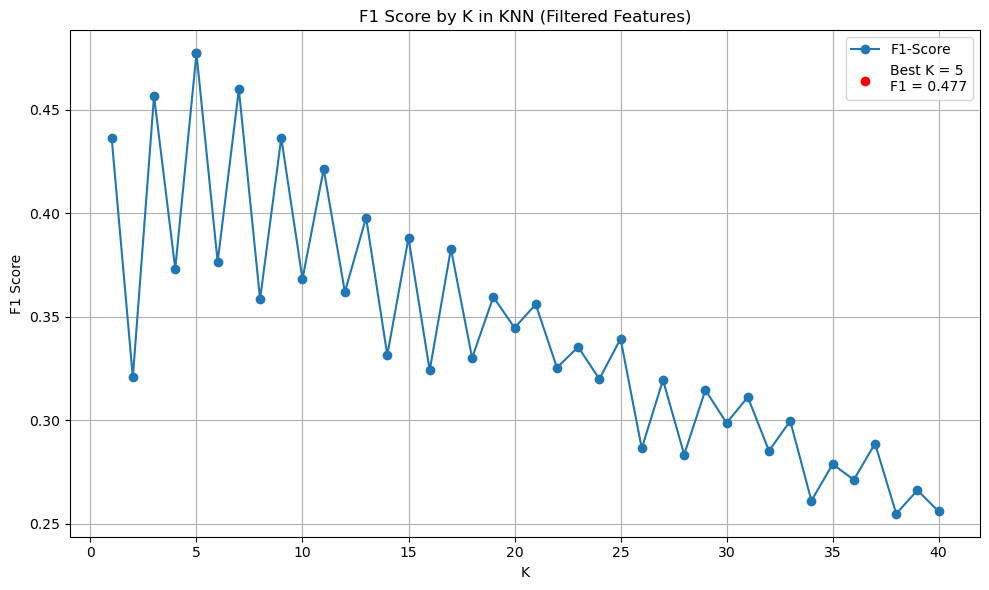

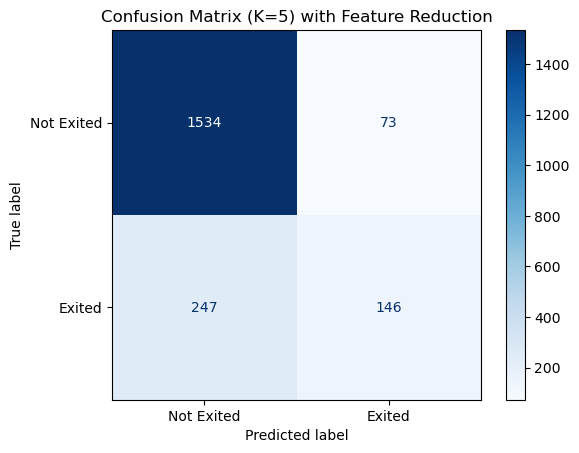

Classification Report (K=5) with Feature Reduction:
              precision    recall  f1-score   support

  Not Exited       0.86      0.95      0.91      1607
      Exited       0.67      0.37      0.48       393

    accuracy                           0.84      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. הסרת עמודות מזהות + Complain + העמודות שנבחרו להסרה
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Exited', 'Complain',
                   'EstimatedSalary', 'Point Earned', 'HasCrCard','Card Type_SILVER','Satisfaction Score']
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
y = df['Exited']

# 2. קידוד משתנים קטגוריים - שומרים את כל הקטגוריות
X = pd.get_dummies(X, drop_first=False)

# 3. חלוקה ל-Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. תקנון
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 5. מציאת K הטוב ביותר לפי F1-score
best_f1 = 0
best_k = 0
f1_scores = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_k = k

print(f"ה-K הכי טוב לפי F1: {best_k} עם F1 = {best_f1:.3f}")

# 6. גרף F1 לפי K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), f1_scores, marker='o', label="F1-Score")
plt.scatter(best_k, best_f1, color='red', label=f'Best K = {best_k}\nF1 = {best_f1:.3f}')
plt.title("F1 Score by K in KNN (Filtered Features)")
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7. מודל סופי ודוח
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred = final_knn.predict(X_test_scaled)

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (K={best_k}) with Feature Reduction")
plt.grid(False)
plt.show()

# דוח סיווג
print(f"Classification Report (K={best_k}) with Feature Reduction:")
print(classification_report(y_test, y_pred, target_names=["Not Exited", "Exited"]))

<div dir="rtl">

## סיכום תוצאות מודל KNN (עם צמצום מאפיינים)

במודל KNN בוצעה בדיקה למציאת ערך K האופטימלי על בסיס ציון ה־F1.  
נמצא כי הערך הטוב ביותר הוא K = 5, שהשיג F1 = 0.477.

### ביצועי המודל (K = 5)

- דיוק (Accuracy): 0.84  
- Precision – לא עזבו (Not Exited): 0.86  
- Recall – לא עזבו (Not Exited): 0.95  
- Precision – עזבו (Exited): 0.67  
- Recall – עזבו (Exited): 0.37  
- F1 כולל: 0.48  

### מטריצת בלבול

- חיזוי נכון – לא עזבו: 1534  
- חיזוי שגוי – לא עזבו: 73  
- חיזוי נכון – עזבו: 146  
- חיזוי שגוי – עזבו: 247  

**מסקנה:** המודל מצטיין בזיהוי לקוחות שלא עזבו (Recall גבוה בקבוצת Not Exited),  
אך פחות מדויק בזיהוי אלו שעזבו בפועל. ייתכן ששיפור באיזון המידע או בשקלול המאפיינים  
ישפר את הביצועים עבור קבוצה זו.

</div>

In [26]:
df.Exited.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [27]:
stratify_column = df["Exited"]

In [28]:
from sklearn.model_selection import train_test_split

y = df['Exited']
X = df.drop(columns='Exited')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [30]:
# עץ בסיסי
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

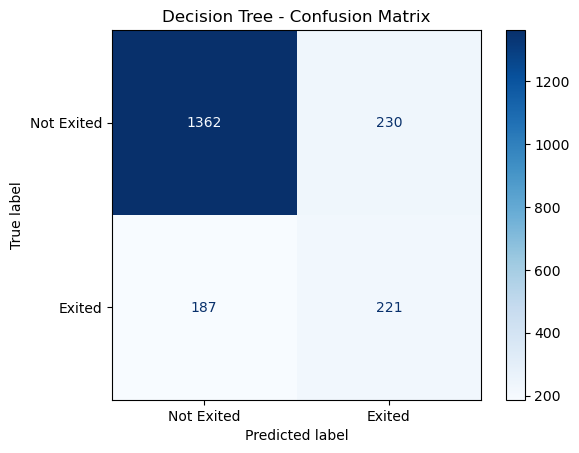

              precision    recall  f1-score   support

  Not Exited       0.88      0.86      0.87      1592
      Exited       0.49      0.54      0.51       408

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



In [31]:
# תחזית
y_pred = tree_clf.predict(X_test)

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.grid(False)
plt.show()

# דוח סיווג
print(classification_report(y_test, y_pred, target_names=["Not Exited", "Exited"]))

In [41]:
# סריקת ערכים שונים של max_depth בעזרת GridSearchCV
param_grid = {'max_depth': list(range(2, 21))}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print(f"Best depth: {grid_search.best_params_['max_depth']}")
print(f"Best F1 Score (CV): {grid_search.best_score_:.3f}")

Best depth: 7
Best F1 Score (CV): 0.557


In [42]:
from sklearn.tree import DecisionTreeClassifier

# אימון עץ מסווג עם העומק האופטימלי
pruned_tree = DecisionTreeClassifier(max_depth=7, random_state=42)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

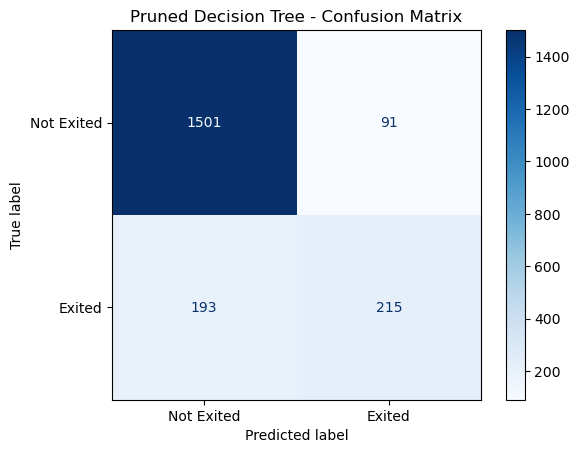

Classification Report for Pruned Tree (max_depth=7):
              precision    recall  f1-score   support

  Not Exited       0.89      0.94      0.91      1592
      Exited       0.70      0.53      0.60       408

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# תחזית
y_pred_pruned = pruned_tree.predict(X_test)

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred_pruned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title("Pruned Decision Tree - Confusion Matrix")
plt.grid(False)
plt.show()

# דוח סיווג
print("Classification Report for Pruned Tree (max_depth=7):")
print(classification_report(y_test, y_pred_pruned, target_names=["Not Exited", "Exited"]))

<div dir="rtl">

## סיכום תוצאות – עצי סיווג

### עץ סיווג בסיסי (ללא גיזום)
- **Precision**:  
  - לא עזב (Not Exited): 0.88  
  - עזב (Exited): 0.49
- **Recall**:  
  - לא עזב: 0.86  
  - עזב: 0.54
- **F1-Score**:  
  - לא עזב: 0.87  
  - עזב: 0.51
- **דיוק כולל (Accuracy)**: 0.79  
- **ממוצע מאקרו F1**: 0.69  

---

### עץ סיווג לאחר גיזום (max_depth = 7)
- **Precision**:  
  - לא עזב: 0.89  
  - עזב: 0.70
- **Recall**:  
  - לא עזב: 0.94  
  - עזב: 0.53
- **F1-Score**:  
  - לא עזב: 0.91  
  - עזב: 0.60
- **דיוק כולל (Accuracy)**: 0.86  
- **ממוצע מאקרו F1**: 0.76  

---

### מסקנות
הגיזום  שיפר את דיוק המודל ואת היכולת לזהות לקוחות שלא עזבו, תוך עלייה ניכרת בדיוק הכולל ובמדד ה-F1 של מחלקת "Exited". למרות ירידה קלה ב-Recall של המחלקה "Exited", השיפור הכולל במדדים מצדיק את השימוש בגיזום.

</div>

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# מודל בסיסי
rf_classifier = RandomForestClassifier(random_state=42)

# הגדרת רשת פרמטרים
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 10, 14],
    'criterion': ['gini', 'entropy']
}

# Grid Search עם 5-fold CV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

# הרצה
grid_search.fit(X_train, y_train)

# תוצאות
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 100}


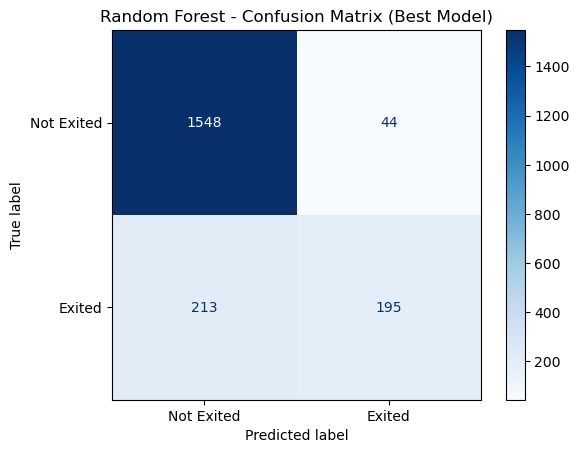

Classification Report - Random Forest (Test Set):
              precision    recall  f1-score   support

  Not Exited       0.88      0.97      0.92      1592
      Exited       0.82      0.48      0.60       408

    accuracy                           0.87      2000
   macro avg       0.85      0.73      0.76      2000
weighted avg       0.87      0.87      0.86      2000



In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# בניית המודל האופטימלי
best_rf = grid_search.best_estimator_

# חיזוי על סט הבדיקה
y_pred = best_rf.predict(X_test)

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix (Best Model)")
plt.grid(False)
plt.show()

# דוח סיווג
print("Classification Report - Random Forest (Test Set):")
print(classification_report(y_test, y_pred, target_names=["Not Exited", "Exited"]))

<div dir="rtl">

## סיכום תוצאות – Random Forest

- **פרמטרים אופטימליים (GridSearchCV)**:  
  - `criterion`: gini  
  - `max_depth`: 14  
  - `max_features`: sqrt  
  - `n_estimators`: 100  

---

### ביצועי המודל (סט בדיקה)
- **Precision**:  
  - לא עזב: 0.88  
  - עזב: 0.82
- **Recall**:  
  - לא עזב: 0.97  
  - עזב: 0.48
- **F1-Score**:  
  - לא עזב: 0.92  
  - עזב: 0.60
- **דיוק כולל (Accuracy)**: 0.87  
- **ממוצע מאקרו F1**: 0.76  

---

### מסקנות
מודל ה-Random Forest הציג ביצועים גבוהים במיוחד בזיהוי לקוחות שלא עזבו (Recall של 97%), אך פחות מדויק בזיהוי אלו שכן עזבו (Recall של 48%). עם זאת, הוא משיג איזון טוב יחסית בין Precision ל-Recall, ומציג דיוק כולל גבוה.

</div>

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [3, 4],
    'subsample': [0.8],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.8}


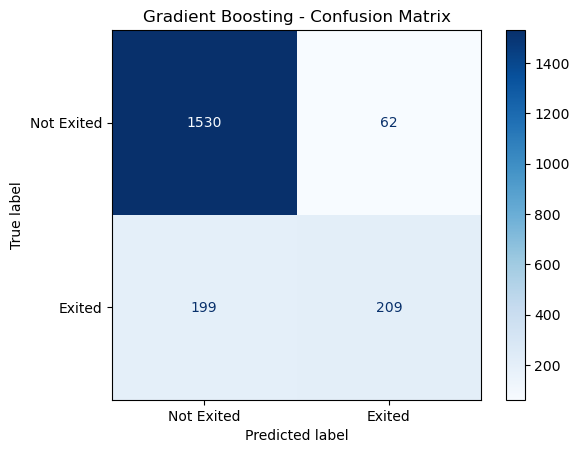

Classification Report - Gradient Boosting (Final Model):
              precision    recall  f1-score   support

  Not Exited       0.88      0.96      0.92      1592
      Exited       0.77      0.51      0.62       408

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# מודל עם הפרמטרים שנבחרו
final_gb = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    max_features='sqrt',
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# אימון וחיזוי
final_gb.fit(X_train, y_train)
y_pred = final_gb.predict(X_test)

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])
disp.plot(cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.grid(False)
plt.show()

# דוח סופי
print("Classification Report - Gradient Boosting (Final Model):")
print(classification_report(y_test, y_pred, target_names=["Not Exited", "Exited"]))

<div dir="rtl">

## סיכום תוצאות – Gradient Boosting

- **פרמטרים אופטימליים (GridSearchCV)**:  
  - `learning_rate`: 0.1  
  - `max_depth`: 4  
  - `max_features`: sqrt  
  - `n_estimators`: 100  
  - `subsample`: 0.8  

---

### ביצועי המודל (סט בדיקה)
- **Precision**:  
  - לא עזב: 0.88  
  - עזב: 0.77
- **Recall**:  
  - לא עזב: 0.96  
  - עזב: 0.51
- **F1-Score**:  
  - לא עזב: 0.92  
  - עזב: 0.62
- **דיוק כולל (Accuracy)**: 0.87  
- **ממוצע מאקרו F1**: 0.77  

---

### מסקנות
מודל ה-Gradient Boosting הציג ביצועים דומים ל-Random Forest, עם דיוק כולל של 87% ויתרון מסוים ב-F1 עבור לקוחות שעזבו (0.62 לעומת 0.60 ב-Random Forest). הוא שומר על Recall גבוה עבור לקוחות שלא עזבו, ומשפר מעט את זיהוי העוזבים.

</div>

<div dir="rtl">

## השוואת ביצועים – מודלי סיווג

| מודל                     | Accuracy | Precision (Exited) | Recall (Exited) | F1 (Exited) |
|--------------------------|----------|--------------------|-----------------|-------------|
| **לוגיסטי (Final)**      | 0.77     | 0.46               | 0.66            | 0.54        |
| **KNN (K=5)**            | 0.84     | 0.67               | 0.37            | 0.48        |
| **Decision Tree**        | 0.79     | 0.49               | 0.54            | 0.51        |
| **Decision Tree Pruned** | 0.86     | 0.70               | 0.53            | 0.60        |
| **Random Forest**        | 0.87     | 0.82               | 0.48            | 0.60        |
| **Gradient Boosting**    | 0.87     | 0.77               | 0.51            | 0.62        |

---

### מסקנות
- מודלי **Random Forest** ו-**Gradient Boosting** מציגים את הביצועים הגבוהים ביותר עם Accuracy של 87%.
- מודל ה-**Gradient Boosting** משיג יתרון קל בזיהוי לקוחות שעזבו (F1 של 0.62 לעומת 0.60 ב-Random Forest).
- מודלים פשוטים יותר כמו **לוגיסטי** ו-**KNN** הציגו ביצועים נמוכים יותר בזיהוי העוזבים.
- **Pruned Decision Tree** שיפר משמעותית את ביצועי העץ הרגיל, אך עדיין נותר מאחורי המודלים המתקדמים.

**המלצה**: עבור משימה זו, כדאי לבחור במודל **Gradient Boosting** בזכות השילוב בין דיוק כללי גבוה ושיפור בזיהוי הלקוחות שעוזבים.

</div>